# Resonant Triad
The basic governing equations for a resonant triad has the form, 
$$
\dot{z_1} = i\omega_1z_1 + \epsilon C_1z_2^*z_3^*\\
\dot{z_2} = i\omega_2z_2 + \epsilon C_2z_1^*z_3^*\\
\dot{z_3} = i\omega_3z_3 + \epsilon C_3z_1^*z_2^*.
$$

In addition, we assume $C_1+C_2+C_3=0$ and $\omega_1 + \omega_2+\omega_3 = 0$.

In [1]:
# This files includes many possible time integrating methods coded for resonant triads...
# as well as functions that help set up the resonant triad conditions...
# and functions that write the amplitude of each of the 3 waves at each time step.
include("../codes/RT.jl")
seed=1205
Random.seed!(seed);

### Equation parameters
Let us set $\epsilon=0.01$ and $\omega = [-1, 3, -2]$.
$C_1$, $C_2$, and $C_3$ are set to be random floats that add to zero, and have absolute magnitude lesser than or equal to 5.

In [2]:
ϵ = 0.01;        # Nonlinear scale
ω = [-1, 3, -2]; # "slow" wave numbers
C = floatRT(5) # Energy conserving constants
C

3-element Array{Float64,1}:
  1.3140801486467968
 -4.619852488888716 
  3.3057723402419192

### Time-stepper parameters
We need to run this system of ODEs for at least $T=1/\epsilon$.
    Since our goal is to test for time step sizes that are larger than the slowest fast wave number, we want to approximately set $h\geq 1/\omega$.

In [3]:
IC = onUnitCircle(3) # Initial condition
T=1000;               # Final time
L=1000;               # Number of state/amplitudes to save
IC

3-element Array{Complex{Float64},1}:
 -0.7339813089780982 + 0.6791696681027485im
   -0.57666564957615 + 0.816980249821816im 
  0.8320766951772831 + 0.5546605929240428im

#### We will use RK4 with a very small time-step to generate our ground truth solution. 

In [4]:
name="true_seed"*string(seed); 
h=exp10(-5);           # time step size
N = Int(ceil(T/h));    # Number of time-steps to get to T
every = Int(ceil(N/L)) # only save L+1 values total
#RT_amp(N, h, every, IC, ω=ω, ϵ=ϵ, C=C, stepper=RK4, name=name);

## PLOT

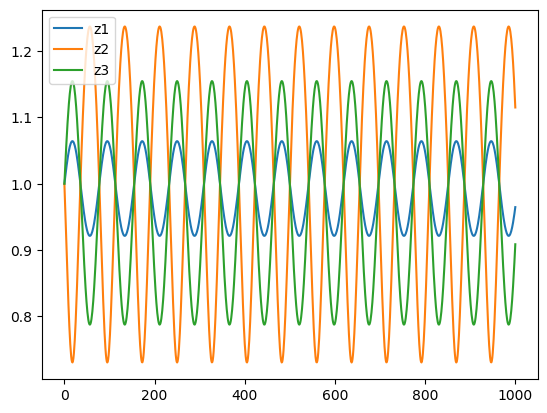

PyObject <matplotlib.legend.Legend object at 0x122b6c978>

In [5]:
# "True" solution
tsol = readdlm("../txtfiles/true_seed"*string(seed)*".txt")
using PyPlot
plot(tsol[:,1], label="z1")
plot(tsol[:,2], label="z2")
plot(tsol[:,3], label="z3")
legend()

### Compare methods

In [53]:
steppers =  [IFE, ETD1, CNimex, EUimex]
h = 0.025 # Time-step
ss = length(steppers)
for j = 1 : length(steppers)
	txtname=string(steppers[j])*"h="*string(h)*"seed"*string(seed)
	N = Int(ceil(T/h)); 
    every = Int(ceil(N/L));
	RT_amp(N, h, every, IC, ω=ω, ϵ=ϵ, C=C, stepper=steppers[j], name=txtname);
end

In [54]:
sol = Array{Array{Float64,2},1}(undef,ss);
for i = 1 : ss
    sol[i] = readdlm("../txtfiles/"*string(steppers[i])*"h="*string(h)*"seed"*string(seed)*".txt")
end

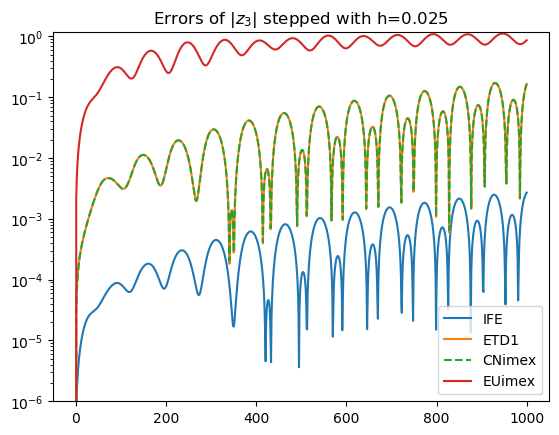

PyObject Text(0.5, 1, 'Errors of $|z_3|$ stepped with h=0.025')

In [60]:
using LaTeXStrings
h=0.025
for i in [1 2 3 4]
    if i == 3
        semilogy(abs.(tsol[:,3]-sol[i][:,3]), label=string(steppers[i]), linestyle="--")
    else
        semilogy(abs.(tsol[:,3]-sol[i][:,3]), label=string(steppers[i]))
    end
end
legend()
ylim(1e-6, 1.2)
title("Errors of "*L"|z_3|"*" stepped with h="*string(h))

In [61]:
steppers =  [IFE, ETD1, CNimex, EUimex]
h = 0.0005 # Time-step
ss = length(steppers)
for j = 1 : length(steppers)
	txtname=string(steppers[j])*"h="*string(h)*"seed"*string(seed)
	N = Int(ceil(T/h)); 
    every = Int(ceil(N/L));
	RT_amp(N, h, every, IC, ω=ω, ϵ=ϵ, C=C, stepper=steppers[j], name=txtname);
end

In [99]:
h=0.0005
sol = Array{Array{Float64,2},1}(undef,ss);
for i = 1 : ss
    sol[i] = readdlm("../txtfiles/"*string(steppers[i])*"h="*string(h)*"seed"*string(seed)*".txt")
end

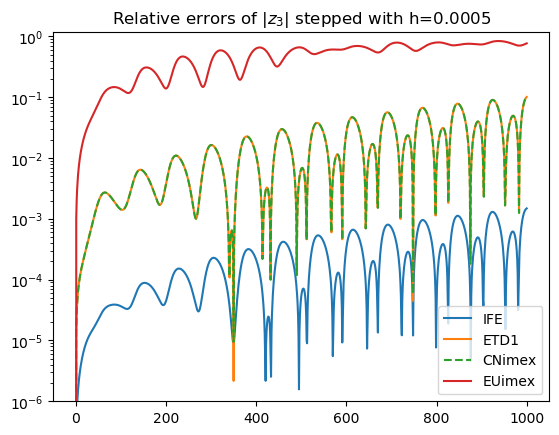

PyObject Text(0.5, 1, 'Relative errors of $|z_3|$ stepped with h=0.0005')

In [100]:
using LaTeXStrings
for i in [1 2 3 4]
    if i == 3
        semilogy(abs.(tsol[:,3]-sol[i][:,3]) ./ abs.(tsol[:,3]), label=string(steppers[i]), linestyle="--")
    else
        semilogy(abs.(tsol[:,3]-sol[i][:,3]) ./ abs.(tsol[:,3]), label=string(steppers[i]))
    end
end
legend()
ylim(1e-6, 1.2)
title("Relative errors of "*L"|z_3|"*" stepped with h="*string(h))

In [64]:
steppers =  [IFE, ETD1, CNimex, EUimex]
h = 0.1 # Time-step
ss = length(steppers)
for j = 1 : length(steppers)
	txtname=string(steppers[j])*"h="*string(h)*"seed"*string(seed)
	N = Int(ceil(T/h)); 
    every = Int(ceil(N/L));
	RT_amp(N, h, every, IC, ω=ω, ϵ=ϵ, C=C, stepper=steppers[j], name=txtname);
end

In [97]:
h = 0.1
sol = Array{Array{Float64,2},1}(undef,ss);
for i = 1 : ss
    sol[i] = readdlm("../txtfiles/"*string(steppers[i])*"h="*string(h)*"seed"*string(seed)*".txt")
end

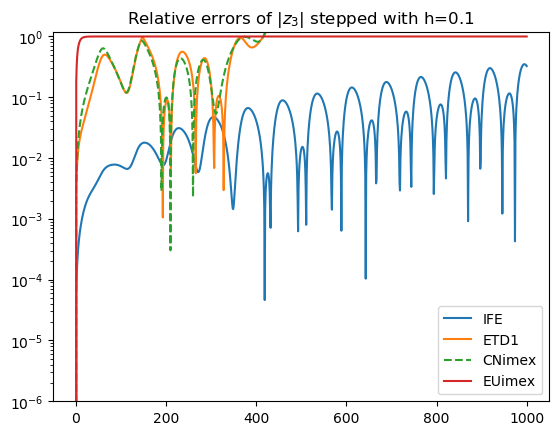

PyObject Text(0.5, 1, 'Relative errors of $|z_3|$ stepped with h=0.1')

In [98]:
for i in [1 2 3 4]
    if i == 3
        semilogy(abs.(tsol[:,3]-sol[i][:,3]) ./ abs.(tsol[:,3]), label=string(steppers[i]), linestyle="--")
    else
        semilogy(abs.(tsol[:,3]-sol[i][:,3])./ abs.(tsol[:,3]), label=string(steppers[i]))
    end
end
legend()
ylim(1e-6, 1.2)
title("Relative errors of "*L"|z_3|"*" stepped with h="*string(h))

In [22]:
steppers =  [IFE, ETD1, CNimex, EUimex]
h = 0.001 # Time-step
ss = length(steppers)
for j = 1 : length(steppers)
	txtname=string(steppers[j])*"h="*string(h)*"seed"*string(seed)
	N = Int(ceil(T/h)); 
    every = Int(ceil(N/L));
	RT_amp(N, h, every, IC, ω=ω, ϵ=ϵ, C=C, stepper=steppers[j], name=txtname);
end

In [8]:
h = 0.001 # Time-step
steppers =  [IFE, ETD1, CNimex, EUimex]
ss = length(steppers)
sol = Array{Array{Float64,2},1}(undef,ss);
for i = 1 : ss
    sol[i] = readdlm("../txtfiles/"*string(steppers[i])*"h="*string(h)*"seed"*string(seed)*".txt")
end

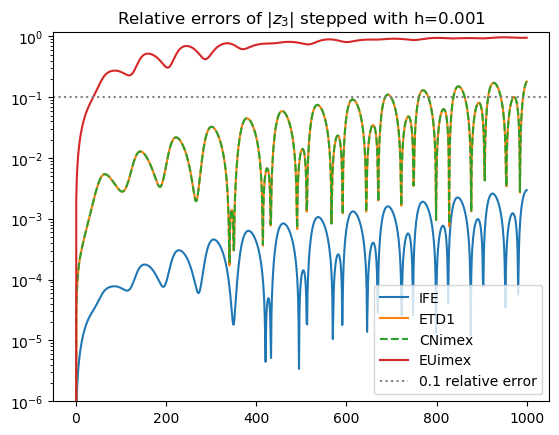

PyObject Text(0.5, 1, 'Relative errors of $|z_3|$ stepped with h=0.001')

In [9]:
for i in [1 2 3 4]
    if i == 3
        semilogy(abs.(tsol[:,3]-sol[i][:,3]) ./ abs.(tsol[:,3]), label=string(steppers[i]), linestyle="--")
    else
        semilogy(abs.(tsol[:,3]-sol[i][:,3])./ abs.(tsol[:,3]), label=string(steppers[i]))
    end
end
axhline(0.1, c=:grey, linestyle=":", label="0.1 relative error")
legend()
ylim(1e-6, 1.2)
title("Relative errors of "*L"|z_3|"*" stepped with h="*rpad(string(h),5,'0'))

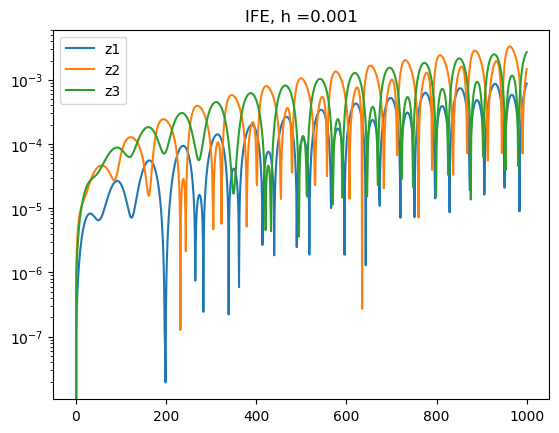

PyObject <matplotlib.legend.Legend object at 0x1431862e8>

In [15]:
i = 1
semilogy(abs.(tsol[:,1]-sol[i][:,1]), label="z1")
semilogy(abs.(tsol[:,2]-sol[i][:,2]), label="z2")
semilogy(abs.(tsol[:,3]-sol[i][:,3]), label="z3")
#plot(sol[1][:,1], label="z1")
#plot(sol[1][:,2], label="z2")
#plot(sol[1][:,3], label="z3")
title(string(steppers[i])*", h ="*string(h))
legend()